<h3>Application of PCA and KMeans clustering based o the explained variance and recommend based on the it.</h3>

In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)

In [11]:
import gc

gc.collect()

27

In [3]:
resturant=pd.read_csv("./resturant.csv")

In [23]:
restaurant

,index,business_id,name,address,city,state,latitude,longitude,stars,review_count,attributes,categories,hours,geometry
0,0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",POINT (-105.28335 40.01754)
1,1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",POINT (-122.59333 45.58891)
2,5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,49.251342,-123.101333,3.5,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",POINT (-123.10133 49.25134)
3,12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,42.541155,-70.973438,4.0,39,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",POINT (-70.97344 42.54116)
4,13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,28.513265,-81.374707,4.5,135,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",POINT (-81.37471 28.51326)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,45.399154,-122.737600,4.0,137,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ...",POINT (-122.73760 45.39915)
26324,160563,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,42.389221,-71.040882,5.0,733,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",POINT (-71.04088 42.38922)
26325,160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,28.544430,-81.351606,4.5,437,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'...",POINT (-81.35161 28.54443)
26326,160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,30.304761,-97.937394,3.0,310,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '...",POINT (-97.93739 30.30476)


 On visualizing the dataset the columns attributes containes multiple dictionarys which need to be separated and converted into keys

In [24]:
# Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}")    

In [25]:
# get dummies from nested attributes
restaurant['BusinessParking'] = restaurant.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'BusinessParking')), axis=1)
restaurant['Ambience'] = restaurant.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Ambience')), axis=1)
restaurant['GoodForMeal'] = restaurant.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'GoodForMeal')), axis=1)
restaurant['Dietary'] = restaurant.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Dietary')), axis=1)
restaurant['Music'] = restaurant.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Music')), axis=1)

In [26]:
restaurant

,index,business_id,name,address,city,state,latitude,longitude,stars,review_count,attributes,categories,hours,geometry,BusinessParking,Ambience,GoodForMeal,Dietary,Music
0,0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,40.017544,-105.283348,4.0,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",POINT (-105.28335 40.01754),"{'garage': False, 'street': True, 'validated':...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
1,1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,45.588906,-122.593331,4.0,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",POINT (-122.59333 45.58891),"{'garage': True, 'street': False, 'validated':...","{'romantic': False, 'intimate': False, 'touris...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
2,5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,49.251342,-123.101333,3.5,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",POINT (-123.10133 49.25134),"{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
3,12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,42.541155,-70.973438,4.0,39,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",POINT (-70.97344 42.54116),"{'garage': False, 'street': False, 'validated'...","{'romantic': False, 'intimate': False, 'classy...",{},{},{}
4,13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,28.513265,-81.374707,4.5,135,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",POINT (-81.37471 28.51326),"{'garage': False, 'street': False, 'validated'...",{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,45.399154,-122.737600,4.0,137,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ...",POINT (-122.73760 45.39915),"{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",{},"{'dj': False, 'background_music': False, 'no_m..."
26324,160563,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,42.389221,-71.040882,5.0,733,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",POINT (-71.04088 42.38922),"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
26325,160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,28.544430,-81.351606,4.5,437,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'...",POINT (-81.35161 28.54443),"{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': None, 'latenight': False, 'lunch':...",{},{}
26326,160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,30.304761,-97.937394,3.0,310,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '...",POINT (-97.93739 30.30476),"{'ga

hence the dictionaries of dictionares present in the attribute columns are separated but now from the above output we are futher concern with separating the futher dictionaries and implement the values as rows and keys as columns as shown below:

In [27]:
# create table with attribute dummies
df_attr = pd.concat([ restaurant['attributes'].apply(pd.Series), restaurant['BusinessParking'].apply(pd.Series),
                    restaurant['Ambience'].apply(pd.Series), restaurant['GoodForMeal'].apply(pd.Series), 
                    restaurant['Dietary'].apply(pd.Series) ], axis=1)
df_attr_dummies = pd.get_dummies(df_attr)
df_attr_dummies

,RestaurantsTableService_False,RestaurantsTableService_None,RestaurantsTableService_True,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_None,WiFi_u'free',WiFi_u'no',WiFi_u'paid',BikeParking_False,BikeParking_None,BikeParking_True,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_None,BusinessAcceptsCreditCards_True,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True,WheelchairAccessible_False,WheelchairAccessible_None,WheelchairAccessible_True,Caters_False,Caters_None,Caters_True,OutdoorSeating_False,OutdoorSeating_None,OutdoorSeating_True,RestaurantsGoodForGroups_False,RestaurantsGoodForGroups_None,RestaurantsGoodForGroups_True,HappyHour_False,HappyHour_None,HappyHour_True,BusinessAcceptsBitcoin_False,BusinessAcceptsBitcoin_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4,RestaurantsPriceRange2_None,HasTV_False,HasTV_None,HasTV_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',...,"DietaryRestrictions_{'dairy-free': False, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}","DietaryRestrictions_{'dairy-free': True, 'gluten-free': True, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}","DietaryRestrictions_{'dairy-free': True, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}",AgesAllowed_u'21plus',AgesAllowed_u'allages',Open24Hours_False,Open24Hours_True,AcceptsInsurance_False,AcceptsInsurance_True,"HairSpecializesIn_{'straightperms': True, 'coloring': True, 'extensions': True, 'africanamerican': True, 'curly': False, 'kids': True, 'perms': True, 'asian': False}",garage_False,garage_True,street_False,street_True,validated_False,validated_True,lot_False,lot_True,valet_False,valet_True,touristy_False,touristy_True,hipster_False,hipster_True,romantic_False,romantic_True,divey_False,divey_True,intimate_False,intimate_True,trendy_False,trendy_True,upscale_False,upscale_True,classy_False,classy_True,casual_False,casual_True,dessert_False,dessert_True,latenight_False,latenight_True,lunch_False,lunch_True,dinner_False,dinner_True,brunch_False,brunch_True,breakfast_False,breakfast_True
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0
26324,1,0,0,0,0,0,0

In [28]:
# get dummies from categories
df_categories_dummies = pd.Series(restaurant['categories']).str.get_dummies(',')
df_categories_dummies

,Acai Bowls,Accessories,Active Life,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Airport Lounges,Airport Shuttles,Airports,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Anesthesiologists,Animal Shelters,Antiques,Apartments,Appliances,Appliances & Repair,Appraisal Services,Aquariums,Arabian,Arcades,Argentine,Armenian,Art Classes,Art Galleries,Art Museums,Art Schools,Art Tours,Arts & Crafts,Arts & Entertainment,Asian Fusion,Australian,Austrian,Auto Detailing,Auto Parts & Supplies,Auto Repair,Automotive,Axe Throwing,Badminton,Bagels,Bakeries,Bangladeshi,Banks & Credit Unions,Bar Crawl,Barbeque,...,Specialty Schools,Sporting Goods,Sports Bars,Sri Lankan,Stadiums & Arenas,Steakhouses,Street Vendors,Strip Clubs,Surf Shop,Sushi Bars,Szechuan,Tabletop Games,Tacos,Tai Chi,Taiwanese,Tapas Bars,Tapas/Small Plates,Tea Rooms,Telecommunications,Tennis,Teppanyaki,Tex-Mex,Thai,Tiki Bars,Tires,Tobacco Shops,Tours,Trainers,Transportation,Trinidadian,Turkish,Tuscan,Ukrainian,Vacation Rentals,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Waffles,Water Parks,Wedding Planning,Whiskey Bars,Wholesale Stores,Wholesalers,Wine Bars,Wine Tasting Room,Wineries,Women's Clothing,Wraps
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# others data from restaurant

other = restaurant[['latitude','longitude','business_id','name']]

In [31]:
other

,latitude,longitude,business_id,name
0,40.017544,-105.283348,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom
1,45.588906,-122.593331,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX
2,49.251342,-123.101333,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food
3,42.541155,-70.973438,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs
4,28.513265,-81.374707,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's
...,...,...,...,...
26323,45.399154,-122.737600,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork
26324,42.389221,-71.040882,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta
26325,28.544430,-81.351606,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill
26326,30.304761,-97.937394,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country


In [32]:
# Concat all tables and drop Restaurant column
df_final = pd.concat([df_attr_dummies, df_categories_dummies, other], axis=1)
df_final.drop('Restaurants',inplace=True,axis=1)

In [39]:
df_final

,RestaurantsTableService_False,RestaurantsTableService_None,RestaurantsTableService_True,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_None,WiFi_u'free',WiFi_u'no',WiFi_u'paid',BikeParking_False,BikeParking_None,BikeParking_True,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_None,BusinessAcceptsCreditCards_True,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True,WheelchairAccessible_False,WheelchairAccessible_None,WheelchairAccessible_True,Caters_False,Caters_None,Caters_True,OutdoorSeating_False,OutdoorSeating_None,OutdoorSeating_True,RestaurantsGoodForGroups_False,RestaurantsGoodForGroups_None,RestaurantsGoodForGroups_True,HappyHour_False,HappyHour_None,HappyHour_True,BusinessAcceptsBitcoin_False,BusinessAcceptsBitcoin_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4,RestaurantsPriceRange2_None,HasTV_False,HasTV_None,HasTV_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',...,Stadiums & Arenas,Steakhouses,Street Vendors,Strip Clubs,Surf Shop,Sushi Bars,Szechuan,Tabletop Games,Tacos,Tai Chi,Taiwanese,Tapas Bars,Tapas/Small Plates,Tea Rooms,Telecommunications,Tennis,Teppanyaki,Tex-Mex,Thai,Tiki Bars,Tires,Tobacco Shops,Tours,Trainers,Transportation,Trinidadian,Turkish,Tuscan,Ukrainian,Vacation Rentals,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Waffles,Water Parks,Wedding Planning,Whiskey Bars,Wholesale Stores,Wholesalers,Wine Bars,Wine Tasting Room,Wineries,Women's Clothing,Wraps,latitude,longitude,business_id,name
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40.017544,-105.283348,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.588906,-122.593331,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.251342,-123.101333,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.541155,-70.973438,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.513265,-81.374707,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.399154,-122.737600,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork
26324,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.389221,-71.040882,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta
26325,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,

Separating last 50 rows for testing purpose

In [36]:
df_test = df_final.iloc[-51:-1,:]

In [40]:
df_test.head()

,RestaurantsTableService_False,RestaurantsTableService_None,RestaurantsTableService_True,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_None,WiFi_u'free',WiFi_u'no',WiFi_u'paid',BikeParking_False,BikeParking_None,BikeParking_True,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_None,BusinessAcceptsCreditCards_True,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True,WheelchairAccessible_False,WheelchairAccessible_None,WheelchairAccessible_True,Caters_False,Caters_None,Caters_True,OutdoorSeating_False,OutdoorSeating_None,OutdoorSeating_True,RestaurantsGoodForGroups_False,RestaurantsGoodForGroups_None,RestaurantsGoodForGroups_True,HappyHour_False,HappyHour_None,HappyHour_True,BusinessAcceptsBitcoin_False,BusinessAcceptsBitcoin_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4,RestaurantsPriceRange2_None,HasTV_False,HasTV_None,HasTV_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',...,Stadiums & Arenas,Steakhouses,Street Vendors,Strip Clubs,Surf Shop,Sushi Bars,Szechuan,Tabletop Games,Tacos,Tai Chi,Taiwanese,Tapas Bars,Tapas/Small Plates,Tea Rooms,Telecommunications,Tennis,Teppanyaki,Tex-Mex,Thai,Tiki Bars,Tires,Tobacco Shops,Tours,Trainers,Transportation,Trinidadian,Turkish,Tuscan,Ukrainian,Vacation Rentals,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Waffles,Water Parks,Wedding Planning,Whiskey Bars,Wholesale Stores,Wholesalers,Wine Bars,Wine Tasting Room,Wineries,Women's Clothing,Wraps,latitude,longitude,business_id,name
26277,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.268492,-123.170271,b61w451sOR6Vsr2WaOe_Jw,Bangkok City Cafe
26278,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.220886,-97.826454,JhrmKjOy9ZrJGhtrzeGIjg,Winston's Kitchen
26279,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.352572,-71.125449,y5iRrweISUHMnATpBGr6uQ,JMP Fine Indian Cuisine
26280,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40.145540,-82.922492,8n2Lbxf8ts89_OxvXLURiA,Panera Bread
26281,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45.503200,-122.671828,yMAHMfrAKQq-2qtZGkClFA,Elephants Delicatessen at South Waterfront


In [74]:
#Saving the testing data as csv file
df_test.to_csv("test_restaurant.csv")

Saving the training datas as in varable X

In [41]:
X = df_final.iloc[:-50,:-4]

In [42]:
X

,RestaurantsTableService_False,RestaurantsTableService_None,RestaurantsTableService_True,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_None,WiFi_u'free',WiFi_u'no',WiFi_u'paid',BikeParking_False,BikeParking_None,BikeParking_True,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_None,BusinessAcceptsCreditCards_True,RestaurantsReservations_False,RestaurantsReservations_None,RestaurantsReservations_True,WheelchairAccessible_False,WheelchairAccessible_None,WheelchairAccessible_True,Caters_False,Caters_None,Caters_True,OutdoorSeating_False,OutdoorSeating_None,OutdoorSeating_True,RestaurantsGoodForGroups_False,RestaurantsGoodForGroups_None,RestaurantsGoodForGroups_True,HappyHour_False,HappyHour_None,HappyHour_True,BusinessAcceptsBitcoin_False,BusinessAcceptsBitcoin_True,RestaurantsPriceRange2_1,RestaurantsPriceRange2_2,RestaurantsPriceRange2_3,RestaurantsPriceRange2_4,RestaurantsPriceRange2_None,HasTV_False,HasTV_None,HasTV_True,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_None,Alcohol_u'beer_and_wine',Alcohol_u'full_bar',...,Specialty Schools,Sporting Goods,Sports Bars,Sri Lankan,Stadiums & Arenas,Steakhouses,Street Vendors,Strip Clubs,Surf Shop,Sushi Bars,Szechuan,Tabletop Games,Tacos,Tai Chi,Taiwanese,Tapas Bars,Tapas/Small Plates,Tea Rooms,Telecommunications,Tennis,Teppanyaki,Tex-Mex,Thai,Tiki Bars,Tires,Tobacco Shops,Tours,Trainers,Transportation,Trinidadian,Turkish,Tuscan,Ukrainian,Vacation Rentals,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Vietnamese,Waffles,Water Parks,Wedding Planning,Whiskey Bars,Wholesale Stores,Wholesalers,Wine Bars,Wine Tasting Room,Wineries,Women's Clothing,Wraps
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26273,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26275,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26276,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2> Implementing PCA <h2>

In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle as pk

----> Firsting finding the PCA on whole 1189 columns 

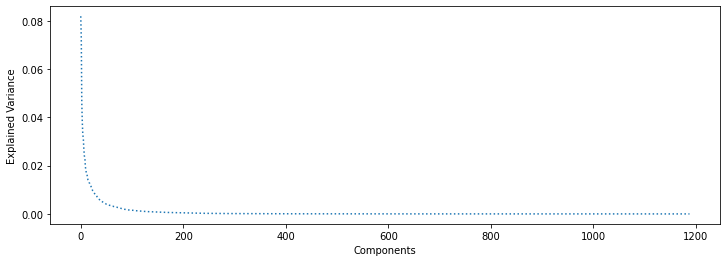

In [45]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)

plt.plot(pca.explained_variance_ratio_, linestyle=":")
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

-----> The variance explained by each components.

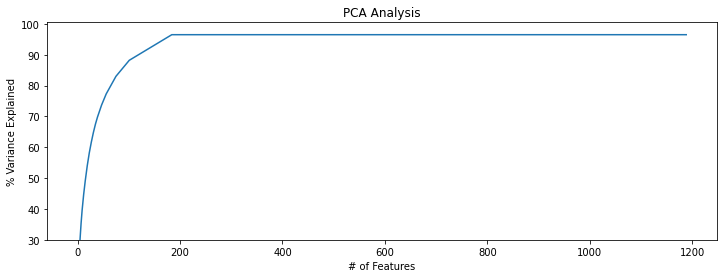

In [46]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

<h4> The above graph represent the cumulative variance explained.<br>
from which we can conclude up to 200 components the maximum of 95% of variance is explained so we can proceed by having 200 PCA components</h4>

In [47]:
pca = PCA(n_components=200)
pca.fit(X)

PCA(n_components=200)

In [77]:
pca

PCA(n_components=200)

Saving tha PCA pickel file

In [76]:
pk.dump(pca, open("pca.pkl","wb"))

In [48]:
X.shape

(26278, 1189)

In [49]:
X_pca = pca.transform(X)

In [50]:
X_pca.shape

(26278, 200)

<h2> KMeans Clustering </h2>

<h5>Here we estimate the best nummber of clusters by ploting 2 to 30 clusters for the above 200 pca components with respect to the SSE(sum of squares)</h5>

In [51]:
sse = {}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    cluster_labels = kmeans.fit_predict(X_pca[:26278])
    sse[k] = kmeans.inertia_
    print(str(k)+" complete")

2 complete
3 complete
4 complete
5 complete
6 complete
7 complete
8 complete
9 complete
10 complete
11 complete
12 complete
13 complete
14 complete
15 complete
16 complete
17 complete
18 complete
19 complete
20 complete
21 complete
22 complete
23 complete
24 complete
25 complete
26 complete
27 complete
28 complete
29 complete


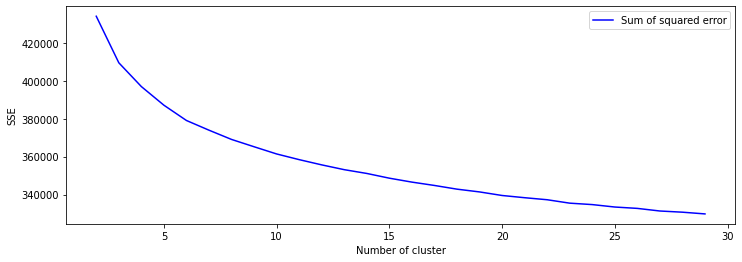

In [52]:
plt.plot(list(sse.keys()), list(sse.values()),'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
plt.show()

Hence from the elbow plot the from the 10 cluster saturation starts to began. and performing KMeans clustering for 10 clusters.

In [9]:
model = KMeans(n_clusters=10)
model.fit(X_pca[:26278])
predict = model.predict(X_pca[:26278])

Saving the model

In [78]:
pk.dump(model, open("kmeans_model.pkl","wb"))

In [54]:
predict

array([4, 8, 2, ..., 9, 2, 2], dtype=int32)

Adding new column "Cluster" based on the model prediction

In [55]:
table = restaurant[['business_id','name', 'latitude','longitude']]

In [58]:
table= table.iloc[:-50,:]

In [59]:
table["cluster"] = predict

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
table

,business_id,name,latitude,longitude,cluster
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,40.017544,-105.283348,4
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,45.588906,-122.593331,8
2,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,49.251342,-123.101333,2
3,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,42.541155,-70.973438,5
4,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,28.513265,-81.374707,0
...,...,...,...,...,...
26273,XCPxbHLo0kmWSQv3ZqJvBg,Pazza on Porter,42.372967,-71.036057,4
26274,1xCLhM57CP6mhGDTKN-uRw,Mojo Taqueria Boulder,40.037234,-105.258958,0
26275,Je0MNZ6Q9GnFmB5vS6UBhw,Sweet Hut Bakery & Cafe,33.893407,-84.284357,9
26276,S2RKI9wDmI4Y5KOM1fgRzQ,River Grille Restaurant & Cafe,42.255889,-71.123719,2


In [61]:
table.to_csv('restaurant_cluster_new_df.csv')

<h3> Recommendation System</h3>

In [47]:
# recommendation system

In [62]:
random_restaurant = table.iloc[np.random.randint(0,26279)]

In [63]:
random_restaurant

business_id    GCYU8MAHAGZdklusLoqajg
name                      Han IL Kwan
latitude                    33.901311
longitude                  -84.276723
cluster                             3
Name: 16851, dtype: object

In [64]:
random_restaurant.cluster

3

<h4>----> Restaurants lying in same clusters</h4> 

In [65]:
table[table["cluster"] == random_restaurant.cluster]

,business_id,name,latitude,longitude,cluster
8,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,45.526473,-122.535323,3
10,TRToVIbaVtu1KOE8DR9gCw,Texas Roadhouse,28.538452,-81.737625,3
23,3_RuVmLNa-1GNHOMvl_bsg,Something Fishy,28.673554,-81.471320,3
24,5eq56X-e9YbAKmHgUOyXSg,Hunan Lion,40.065378,-83.071415,3
26,bP6goJODwRnM3AVy45Kn9w,Papi's Cuban & Caribbean Grill,33.772758,-84.380375,3
...,...,...,...,...,...
26216,EG5RB9AwCV_N4PTYYUoJcg,Buca di Beppo Italian Restaurant,40.108017,-83.015839,3
26227,aSrwFbp5NdtaHvZvRCSmeg,Garden Grill Restaurant,28.373967,-81.552664,3
26236,9N58A1sUJf0ssfaAu2eKMg,Tomasino's Pizza,28.647587,-81.276748,3
26239,Df2QJe-w68JM0fR9rFfPhA,Moldova Restaurant,42.360641,-71.200224,3


In [66]:
clustered_table = table[table["cluster"] == random_restaurant.cluster].drop('cluster',axis=1)

In [67]:
clustered_table

,business_id,name,latitude,longitude
8,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,45.526473,-122.535323
10,TRToVIbaVtu1KOE8DR9gCw,Texas Roadhouse,28.538452,-81.737625
23,3_RuVmLNa-1GNHOMvl_bsg,Something Fishy,28.673554,-81.471320
24,5eq56X-e9YbAKmHgUOyXSg,Hunan Lion,40.065378,-83.071415
26,bP6goJODwRnM3AVy45Kn9w,Papi's Cuban & Caribbean Grill,33.772758,-84.380375
...,...,...,...,...
26216,EG5RB9AwCV_N4PTYYUoJcg,Buca di Beppo Italian Restaurant,40.108017,-83.015839
26227,aSrwFbp5NdtaHvZvRCSmeg,Garden Grill Restaurant,28.373967,-81.552664
26236,9N58A1sUJf0ssfaAu2eKMg,Tomasino's Pizza,28.647587,-81.276748
26239,Df2QJe-w68JM0fR9rFfPhA,Moldova Restaurant,42.360641,-71.200224


<h4>Finding the euclidian distance with in the clusters and recommend the restaurant based on nearest location</h4>

In [68]:
#euclidian distance from random_restaurant
distance = np.sqrt((clustered_table.latitude - random_restaurant.latitude)**2 + (clustered_table.longitude - random_restaurant.longitude)**2)

In [69]:
distance

8        39.985809
10        5.933572
23        5.932936
24        6.280803
26        0.165135
           ...    
26216     6.333484
26227     6.162145
26236     6.049914
26239    15.574180
26266    13.876311
Length: 3359, dtype: float64

In [70]:
clustered_table["distance"] = distance

In [71]:
clustered_table.sort_values('distance',inplace=True)

In [72]:
clustered_table

,business_id,name,latitude,longitude,distance
16851,GCYU8MAHAGZdklusLoqajg,Han IL Kwan,33.901311,-84.276723,0.000000
2282,jWgIJ33n6K7LDUtucE5QXA,La Casona Colombian Restaurant,33.902595,-84.276311,0.001348
14534,gLCRXBEL5TbAUYwSr7D-Dw,Shaking Crawfish,33.900171,-84.278368,0.002002
14728,7CM6odXJfwraY5VHn6aH2Q,Las Delicias de La Abuela,33.905540,-84.273309,0.005435
16877,4fj-YvSUEapc5o_JzYYSgg,Yen Jing,33.897358,-84.281402,0.006125
...,...,...,...,...,...
11964,LiikkUm1Xh7zeC8PiWRvpQ,Kitstaya Sushi,49.264385,-123.174165,41.821466
16303,J1IJtAlrrMDGFsAk89Rnew,Ginger and Soy,49.328371,-123.156244,41.828356
5845,YdFmI972fB1Ss1nUhqwurg,Vina Vietnamese Cuisine,49.334784,-123.182925,41.855522
9872,X9h48aiv6NE_8f2m5UHWKw,Pastameli,49.351290,-123.253876,41.927561


In [73]:
# so recommendation businesses are

clustered_table.iloc[1:11]["name"].to_list()

['La Casona Colombian Restaurant',
 'Shaking Crawfish',
 'Las Delicias de La Abuela',
 'Yen Jing',
 'Hello Chicken',
 'So Kong Dong Tofu House',
 'Kang Nam Japanese Restaurant',
 'Bo Bo Garden',
 'Yummy Spicy',
 'I Luv Pho']